--------------------------------
Data Selection
--------------------------------

    duration  protocol_type   service  flag   src_bytes   dst_bytes   land  \
0          0            tcp   private   REJ           0           0      0   
1          0            tcp   private   REJ           0           0      0   
2          2            tcp  ftp_data    SF       12983           0      0   
3          0           icmp     eco_i    SF          20           0      0   
4          1            tcp    telnet  RSTO           0          15      0   
5          0            tcp      http    SF         267       14515      0   
6          0            tcp      smtp    SF        1022         387      0   
7          0            tcp    telnet    SF         129         174      0   
8          0            tcp      http    SF         327         467      0   
9          0            tcp       ftp    SF          26         157      0   
10         0            tcp    telnet    SF           0     

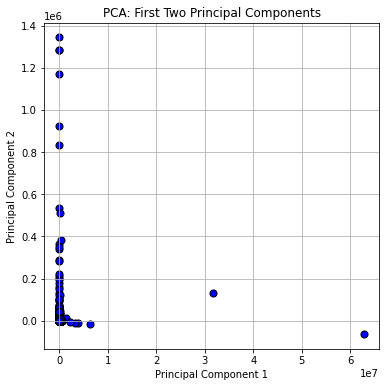

---------------------------------------------
             Data Splitting                  
---------------------------------------------

Total no of input data   : 22544
Total no of test data    : 4509
Total no of train data   : 18035
--------------------------------------------------------------
StratifiedKFold + RandomOverSampler + SVM
--------------------------------------------------------------

Fold Accuracy: 60.5689
Fold Accuracy: 61.7280
Fold Accuracy: 60.6273
Fold Accuracy: 58.0842
Fold Accuracy: 61.3373
---------------------------------------------
Average Accuracy: 60.4691
----------------------------------------------------
     Classification -- Support Vector Machine       
----------------------------------------------------

1)  Accuracy        = 60.46913264275558 %

2)  Error rate      =  39.53086735724442 %

3)  Execution Time  =  353.8250606060028 sec

4)  Sensitivity     =  9.533366783743102 %

5)  Specificity     =  89.7456279809221 %

6) Classification Report  =

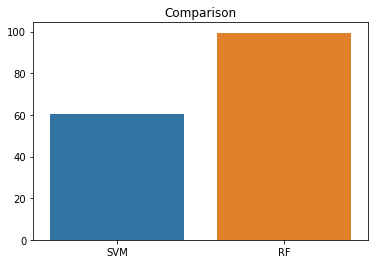

---------------------------------------------


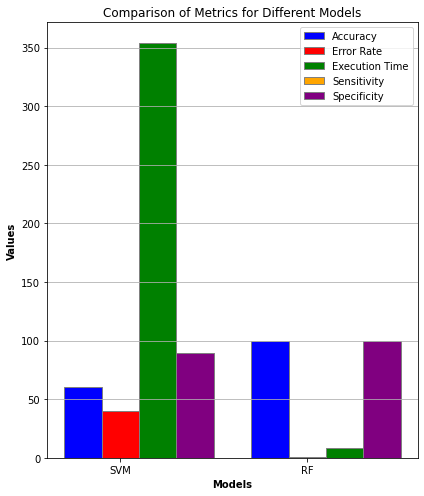

Enter Prediction Number :10
Identified - Attack


In [7]:
# ================================== IMPORT PACKAGES ==================================

import pandas as pd
import time
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn import metrics
import matplotlib.pyplot as plt
import numpy as np
import warnings
warnings.filterwarnings("ignore")

import streamlit as st
import base64
from imblearn.over_sampling import RandomOverSampler

#-------------------------- INPUT DATA --------------------------------


    
dataframe = pd.read_csv(r"C:\Users\simis\Downloads\CODE\CODE\NSL_KDD Dataset.csv")
# dataframe = dataframe[['duration',' protocol_type',' service',' flag',' src_bytes',' dst_bytes',' is_host_login',' is_guest_login','classification']]       
     
print("--------------------------------")
print("Data Selection")
print("--------------------------------")
print()
print(dataframe.head(15))    

    
#-------------------------- PRE PROCESSING --------------------------------

# ==== MISSING VALUES ====
from sklearn.impute import SimpleImputer


print("----------------------------------------------------")
print("              Handling Missing values               ")
print("----------------------------------------------------")
print()


imputer = SimpleImputer(strategy='most_frequent')  

categorical_cols = dataframe.select_dtypes(include=['object']).columns
dataframe[categorical_cols] = imputer.fit_transform(dataframe[categorical_cols])

numerical_cols = dataframe.select_dtypes(include=['int64', 'float64']).columns
imputer = SimpleImputer(strategy='mean')  # For numerical columns
dataframe[numerical_cols] = imputer.fit_transform(dataframe[numerical_cols])

# Check if there are any missing values after imputation
print(dataframe.isnull().sum())


res = dataframe.isnull().sum().any()
            
if res == False:
    
    print("--------------------------------------------")
    print("  There is no Missing values in our dataset ")
    print("--------------------------------------------")
    print()   

else:
        
    print("--------------------------------------------")
    print(" Missing values is present in our dataset   ")
    print("--------------------------------------------")
    print() 

    
    
# ==== LABEL ENCODING ====

print("----------------------------------------------------")
print("            Before Label Encoding                   ")
print("----------------------------------------------------")
print()
print(dataframe['classification'].head(15))


    
    
from sklearn import preprocessing

label_encoder = preprocessing.LabelEncoder()

dataframe['classification']= label_encoder.fit_transform(dataframe['classification'])

dataframe[' protocol_type']= label_encoder.fit_transform(dataframe[' protocol_type'])

dataframe[' service']= label_encoder.fit_transform(dataframe[' service'])

dataframe[' flag']= label_encoder.fit_transform(dataframe[' flag'])


print("----------------------------------------------------")
print("            After Label Encoding                   ")
print("----------------------------------------------------")
print()
print(dataframe['classification'].head(15))


    
#-------------------------- FEATURE EXTRACTION  --------------------------------
        
from sklearn.decomposition import PCA  


#  PCA
pca = PCA(n_components=20) 
principal_components = pca.fit_transform(dataframe)


print("---------------------------------------------")
print("   Feature Extraction ---> PCA               ")
print("---------------------------------------------")

print()

print(" Original Features     :",dataframe.shape[1])
print(" Reduced Features      :",principal_components.shape[1])

    
# Plot the results
plt.figure(figsize=(6, 6))
plt.scatter(principal_components[:, 0], principal_components[:, 1], c='blue', edgecolor='k', s=50)
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.title('PCA: First Two Principal Components')
plt.grid()
plt.savefig("pca.png")
plt.show()
    
    

#-------------------------- DATA SPLITTING  --------------------------------


X=dataframe.drop('classification',axis=1)
        
y=dataframe['classification']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

print("---------------------------------------------")
print("             Data Splitting                  ")
print("---------------------------------------------")

print()

print("Total no of input data   :",dataframe.shape[0])
print("Total no of test data    :",X_test.shape[0])
print("Total no of train data   :",X_train.shape[0])
    
   
#-------------------------- CLASSIFICATION --------------------------------
    
#-------------------------------------------------
# StratifiedKFold + RandomOverSampler + SVM
#-------------------------------------------------

print("--------------------------------------------------------------")
print("StratifiedKFold + RandomOverSampler + SVM")
print("--------------------------------------------------------------")
print()

from sklearn.model_selection import StratifiedKFold
from imblearn.over_sampling import RandomOverSampler
from sklearn.metrics import accuracy_score
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC

start_svm = time.time()

# Stratified 5-Fold Cross-Validation
kf = StratifiedKFold(n_splits=5, shuffle=True, random_state=0)

# Initialize RandomOverSampler
ros = RandomOverSampler(random_state=0)

# Initialize SVM
svmm = SVC()

# Arrays to store results
accuracies = []

# Stratified Cross-Validation with Random Over-sampling
for train_index, val_index in kf.split(X, y):
    # Split data into training and validation sets
    X_train, X_val = X.iloc[train_index], X.iloc[val_index]
    y_train, y_val = y.iloc[train_index], y.iloc[val_index]
    
    # Apply Random Over-sampling to the training data
    X_res, y_res = ros.fit_resample(X_train, y_train)
    
    # Train the model
    svmm.fit(X_res, y_res)
    
    # Validate the model
    y_pred = svmm.predict(X_res)
    
    # Calculate the accuracy
    accuracy = accuracy_score(y_res, y_pred) * 100
    accuracies.append(accuracy)
    
    print(f"Fold Accuracy: {accuracy:.4f}")



# Calculate average accuracy over all folds
print("---------------------------------------------")
print(f"Average Accuracy: {np.mean(accuracies):.4f}")

acc_svmm = np.mean(accuracies)

# acc_svmm = acc_svmm * 100

loss = 100 - acc_svmm
# Classification report
report_svm = metrics.classification_report(y_test, y_pred[0:len(y_test)], target_names=['Attack', 'Non-Attack'])

# Confusion matrix
cm = metrics.confusion_matrix(y_test, y_pred[0:len(y_test)])
tn, fp, fn, tp = cm.ravel()

# Calculate sensitivity and specificity
sensitivity_svm = tp / (tp + fn) * 100
specificity_svm = tn / (tn + fp) * 100

end_svm = time.time()


exec_time = (end_svm-start_svm) * 10**3

exec_time_svm = exec_time/1000


print("----------------------------------------------------")
print("     Classification -- Support Vector Machine       ")
print("----------------------------------------------------")

print()

print("1)  Accuracy        =", acc_svmm ,'%')
print()
print("2)  Error rate      = ", loss ,'%' )
print()
print("3)  Execution Time  = ", exec_time_svm , 'sec')
print()
print("4)  Sensitivity     = ", sensitivity_svm , '%')
print()
print("5)  Specificity     = ", specificity_svm ,'%')
print()
print("6) Classification Report  = ", )
print()
print(report_svm)




#-------------------------------------------------
# StratifiedKFold + RandomOverSampler + RF
#-------------------------------------------------

start_rf = time.time()


from sklearn.ensemble import RandomForestClassifier

# Stratified 5-Fold Cross-Validation
kf1 = StratifiedKFold(n_splits=5, shuffle=True, random_state=0)

# Initialize RandomOverSampler
ros1 = RandomOverSampler(random_state=0)

# Initialize SVM
rf = RandomForestClassifier()

# Arrays to store results
accuracies = []

# Stratified Cross-Validation with Random Over-sampling
for train_index, val_index in kf1.split(X, y):
    # Split data into training and validation sets
    X_train, X_val = X.iloc[train_index], X.iloc[val_index]
    y_train, y_val = y.iloc[train_index], y.iloc[val_index]
    
    # Apply Random Over-sampling to the training data
    X_res, y_res = ros1.fit_resample(X_train, y_train)
    
    # Train the model
    rf.fit(X_res, y_res)
    
    # Validate the model
    y_pred_rf = rf.predict(X_val)
    
    # Calculate the accuracy
    accuracy = accuracy_score(y_val, y_pred_rf) * 100
    accuracies.append(accuracy)
    
    print(f"Fold Accuracy: {accuracy:.4f}")
    
    
rf.fit(X_train, y_train)

pred_rf= rf.predict(X_test)

acc_rf = metrics.accuracy_score(pred_rf,y_test)* 100


    
loss_rf = 100 - acc_rf
# Classification report
report_rf = metrics.classification_report(y_test, pred_rf, target_names=['Attack', 'Non-Attack'])

# Confusion matrix
cm = metrics.confusion_matrix(y_test, pred_rf)
tn, fp, fn, tp = cm.ravel()

# Calculate sensitivity and specificity
sensitivity_rf = tp / (tp + fn) * 100
specificity_rf = tn / (tn + fp) * 100



end_rf = time.time()


exec_time = (end_rf-start_rf) * 10**3

exec_time_rf = exec_time/1000



print("----------------------------------------------------")
print("     Classification -- RF      ")
print("----------------------------------------------------")

print()

print("1)  Accuracy        =", acc_rf ,'%')
print()
print("2)  Error rate      = ", loss_rf ,'%' )
print()
print("3)  Execution Time  = ", exec_time_rf , 'sec')
print()
print("4)  Sensitivity     = ", sensitivity_rf , '%')
print()
print("5)  Specificity     = ", specificity_rf ,'%')
print()
print("6) Classification Report  = ", )
print()
print(report_rf)
    
    
    
    
    
    
    
    
    
    
    
    
    
    
    
    
    


# -------------------------- COMPARISON GRAPH -------------------


import seaborn as sns
sns.barplot(x=['SVM','RF'],y=[acc_svmm,acc_rf])
plt.title("Comparison")
# plt.savefig("com.png")
plt.show()


print("---------------------------------------------")

import matplotlib.pyplot as plt
import numpy as np

# Sample data
models = ['SVM', 'RF']
accuracy = [acc_svmm, acc_rf]  
error_rate = [loss, loss_rf]  
execution_time = [exec_time_svm,exec_time_rf ]  
sensitivity = [sensitivity_svm, sensitivity_rf]  
specificity = [specificity_svm, specificity_rf]  

# Number of metrics
num_metrics = 4

# Set width of bars
bar_width = 0.2

# Set position of bar on X axis
r1 = np.arange(len(models))
r2 = [x + bar_width for x in r1]
r3 = [x + bar_width for x in r2]
r4 = [x + bar_width for x in r3]
# r5 = [x + bar_width for x in r4]

# Create grouped bar chart
fig, ax = plt.subplots(figsize=(6, 7))

# Plot bars for each metric
bars1 = ax.bar(r1, accuracy, color='blue', width=bar_width, edgecolor='grey', label='Accuracy')
bars2 = ax.bar(r2, error_rate, color='red', width=bar_width, edgecolor='grey', label='Error Rate')
bars3 = ax.bar(r3, execution_time, color='green', width=bar_width, edgecolor='grey', label='Execution Time')
bars4 = ax.bar(r4, sensitivity, color='orange', width=bar_width, edgecolor='grey', label='Sensitivity')
bars5 = ax.bar(r4, specificity, color='purple', width=bar_width, edgecolor='grey', label='Specificity')

# Add labels and title
ax.set_xlabel('Models', fontweight='bold')
ax.set_ylabel('Values', fontweight='bold')
ax.set_title('Comparison of Metrics for Different Models')
ax.set_xticks([r + bar_width for r in r1])
ax.set_xticklabels(models)
ax.legend()

# Add a grid for easier readability
ax.yaxis.grid(True)

# Display the plot
plt.tight_layout()
plt.savefig("gra.png")
# 
plt.show()


    
# -------------------------- PREDICTION  ----------------------


inputt = int(input("Enter Prediction Number :"))


inputt = int(inputt)
if pred_rf[inputt] == 0:
    
    final_res = "Identified - Attack"
    
    print(final_res)
    
    
else:
    
    final_res = "Identified - Non Attack"

    print(final_res)


    
   